In [43]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import random
from matplotlib import rcParams
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score,silhouette_samples


# 生成示例数据，100个4维数据点
# Method = "HYPE"
Method = "entropy"
# Method = "MinMax"
# Method = "BiPart"
# Method = "random"
# Method = "KaHyPar"
p = 4
vertexScheme = "/raid/guan/large-cluster/comm/test_data/4/out.github/"+Method+".txt"
EdgeInfo = "/raid/guan/hypergraph/data/out.github"

# rcParams['font.family'] = 'serif'
# rcParams['font.serif'] = 'Times New Roman'
# rcParams['font.size'] = 18
# rcParams['text.usetex'] = True

v2p = {}
with open(vertexScheme, "r") as file:
    for line in file:
        vid,pid = line.split()
        vid = int(vid)
        pid = int(pid)
        v2p[vid] = pid

p2e = {}
for i in range(p):
    p2e[i] = set()
v2e = {}
with open(EdgeInfo, "r") as file:
    for line in file:
        if line[0] >'9' or line[0] < '0':
            continue
        vid,eid = line.split()
        vid = int(vid)
        eid = int(eid)
        if vid not in v2e: 
            v2e[vid] = []
        v2e[vid].append(eid)
        p2e[v2p[vid]].add(eid)


ghh: 0.5210819522618579
56520
5000
0.26381922


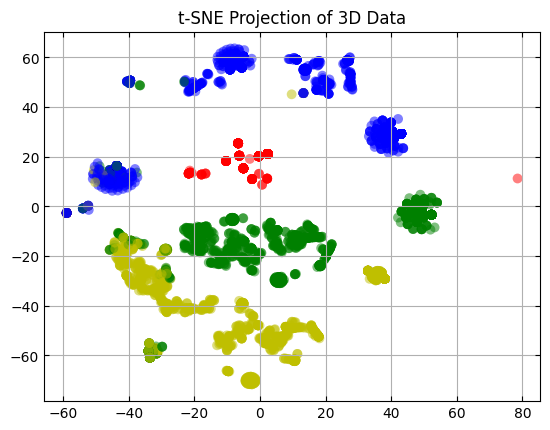

0.26381922


In [45]:
data = []
lst = list(set(v2p.keys()))
lst = random.choices(lst, k=5000)
for vid in lst:
    data.append([])
    cnt = 0
    for pid in range(p):
        data[-1].append(0)
        if vid not in v2e :
            continue
        for eid in v2e[vid]:
            if eid in p2e[pid]:
                data[-1][-1] += 1
                cnt += 1
    if cnt == 0:
        continue
    for pid in range(p):
        data[-1][pid] = data[-1][pid]/len(v2e[vid])

# clusters = [[] for i in range(p)]
# for i in range(len(lst)):
#     vid = lst[i]
#     clusters[v2p[vid]].append(i)

# center = []
# for clus in clusters :
#     center.append([0 for i in range(len(data))])
#     for i in clus:
#         for j in range(len(data[i])):
#             center[-1][j] += data[i][j] / len(clus) * random.uniform(0.999,1.001)
# # print("center:",center)

# inter_cluster_distances = pairwise_distances(center, metric='euclidean')
# average_inter_cluster_distance = np.sum(inter_cluster_distances) / (len(center) * (len(center) - 1))
# print("ave dis:",average_inter_cluster_distance )


silhouette_values = silhouette_samples(data, [v2p[i] for i in lst])
# 获取轮廓系数前 10% 的节点
percentile = 99
threshold_value = np.percentile(silhouette_values, percentile)

# 选择轮廓系数超过阈值的节点
selected_nodes = np.where(silhouette_values <= threshold_value)[0]

# 计算前 10% 节点的轮廓系数平均值
average_silhouette = np.mean(silhouette_values[selected_nodes])



print("ghh:",average_silhouette)


tmp = ["r","b","g","y"]
print(len(v2p.keys()))
colors = [tmp[v2p[i]] for i in lst]

np.random.seed(42)
print(len(data))
data = np.array(data)

# print(data)

# 标准化数据


# 执行PCA降维到2维
cluster = [[]for i in range(p)]
# for vid in lst:
tsne = TSNE(n_components=2, random_state=42)
data_2d = tsne.fit_transform(data)

# 绘制散点图
plt.scatter(data_2d[:, 0], data_2d[:, 1] ,c = colors, marker='o', alpha=0.5, s=50, edgecolors='none')
plt.title('t-SNE Projection of 3D Data')

plt.tick_params(axis='both', right = True, top = True,direction='in')
# plt.yticks(ticks=[50*i for i in range(int(min(data_2d[:, 0])/50-1),int(max(data_2d[:, 0])/50+1))],labels = [])
# plt.xticks(ticks=[50*i for i in range(int(min(data_2d[:, 1])/50-1),int(max(data_2d[:, 1])/50+1))],labels = [])
silhouette_avg = silhouette_score(data_2d, [v2p[i] for i in lst])
print(silhouette_avg)


plt.grid(True)
plt.savefig("./pic/"+ Method +".pdf")
plt.show()
silhouette_avg = silhouette_score(data_2d, [v2p[i] for i in lst])
print(silhouette_avg)
